# Mask R-CNN - Test on Shapes Dataset

Run the Mask R-CNN net in inference mode, with the additional PCILayer that generates the context-based tensor 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import pprint
import keras.backend as KB
sys.path.append('../')

import mrcnn.model     as modellib
import mrcnn.visualize as visualize
import mrcnn.shapes    as shapes
from mrcnn.shapes      import ShapesConfig
from mrcnn.config      import Config
from mrcnn.model       import log
from mrcnn.dataset     import Dataset 
# from mrcnn.pc_prototype import PCTensor
from mrcnn.pcn_layer    import PCNLayer, PCILayer

# Root directory of the project
ROOT_DIR = os.getcwd()
MODEL_PATH = 'E:\Models'
# Directory to save logs and trained model
MODEL_DIR = os.path.join(MODEL_PATH, "mrcnn_logs")
# Path to COCO trained weights
COCO_MODEL_PATH   = os.path.join(MODEL_PATH, "mask_rcnn_coco.h5")
RESNET_MODEL_PATH = os.path.join(MODEL_PATH, "resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

print("Tensorflow Version: {}   Keras Version : {} ".format(tf.__version__,keras.__version__))
pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100)

# Build configuration object -----------------------------------------------
config = shapes.ShapesConfig()
config.BATCH_SIZE      = 2                    #Batch size is 2 (# GPUs * images/GPU).
config.IMAGES_PER_GPU  = 2
config.STEPS_PER_EPOCH = 7
config.IMAGES_PER_GPU  = 1
config.display() 

# Build shape dataset        -----------------------------------------------

# from mrcnn.datagen import data_generator, load_image_gt

# Training dataset generate 500 shapes 
dataset_train = shapes.ShapesDataset()
dataset_train.load_shapes(500, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
dataset_train.prepare()

# Validation dataset
dataset_val = shapes.ShapesDataset()
dataset_val.load_shapes(50, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
dataset_val.prepare()

# Load and display random samples
# image_ids = np.random.choice(dataset_train.image_ids, 3)
# for image_id in [3]:
#     image = dataset_train.load_image(image_id)
#     mask, class_ids = dataset_train.load_mask(image_id)
#     visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)


D:\Program Files\Anaconda3\envs\TF_gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ImportError: No module named 'mrcnn.pc_layer'

In [ ]:
model.compile_only(learning_rate=config.LEARNING_RATE, layers='heads')
KB.set_learning_phase(1)
print(' Learning phase values is L ' ,KB.learning_phase())
mm = model.keras_model
print('\n Metrics (_get_deduped_metrics_names():) ') 
pp.pprint(mm._get_deduped_metrics_names())
print('\n Outputs: ') 
pp.pprint(mm.outputs)
print('\n Losses (model.metrics_names): ') 
pp.pprint(mm.metrics_names)



## Detection

In [3]:
class InferenceConfig(ShapesConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()
inference_config.display() 


Configurations:
BACKBONE_SHAPES                [[32 32]
 [16 16]
 [ 8  8]
 [ 4  4]
 [ 2  2]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  128
IMAGE_MIN_DIM                  128
IMAGE_PADDING                  True
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           shapes
NUM_CLASSES                    4
POOL_SIZE                      7
POST_NMS_ROIS_INFERENCE        1000
POST_NMS_ROIS_TRAINING         2000
ROI_

In [4]:
# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

set_log_dir: Checkpoint path set to : E:\Models\mrcnn_logs\shapes20180329T1212\mask_rcnn_shapes_{epoch:04d}.h5
 IMAGE SHAPE is : 128    128
<class 'list'>
Tensor("rpn_class_logits/concat:0", shape=(?, ?, 2), dtype=float32) rpn_class_logits/concat:0
Tensor("rpn_class/concat:0", shape=(?, ?, 2), dtype=float32) rpn_class/concat:0
Tensor("rpn_bbox/concat:0", shape=(?, ?, 4), dtype=float32) rpn_bbox/concat:0
Proposal Layer init complete. Size of anchors:  (4092, 4)
>>> PCI Layer : initialization
>>> PCI Layer : call
     mrcnn_class.shape    : (?, 1000, 4) <class 'tensorflow.python.framework.ops.Tensor'>
     mrcnn_bbox.shape     : (?, 1000, 4, 4) <class 'tensorflow.python.framework.ops.Tensor'>
     output_rois.shape    : <unknown> <class 'tensorflow.python.framework.ops.Tensor'>
>>> PCN Layer : call end  
>>> MaskRCNN build complete
>>> MaskRCNN initialization complete


In [5]:
# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()[1]

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

find_last info:   dir_name: E:\Models\mrcnn_logs\shapes20180313T1856
find_last info: checkpoint: E:\Models\mrcnn_logs\shapes20180313T1856\mask_rcnn_shapes_0231.h5
Loading weights from  E:\Models\mrcnn_logs\shapes20180313T1856\mask_rcnn_shapes_0231.h5
load_weights: Loading weights from: E:\Models\mrcnn_logs\shapes20180313T1856\mask_rcnn_shapes_0231.h5
load_weights: Log directory set to : E:\Models\mrcnn_logs\shapes20180313T1856\mask_rcnn_shapes_0231.h5
set_log_dir:  model_path (input) is : E:/Models/mrcnn_logs/shapes20180313T1856/mask_rcnn_shapes_0231.h5  
self.epoch set to 232  (Next epoch to run)
set_log_dir: Checkpoint path set to : E:\Models\mrcnn_logs\shapes20180313T1856\mask_rcnn_shapes_{epoch:04d}.h5


### Test on a random image

original_image           shape: (128, 128, 3)         min:   15.00000  max:  239.00000
image_meta               shape: (12,)                 min:    0.00000  max:  128.00000
gt_class_id              shape: (2, 4)                min:   38.00000  max:  128.00000
gt_bbox                  shape: (2, 4)                min:   38.00000  max:  128.00000
gt_mask                  shape: (128, 128, 2)         min:    0.00000  max:    1.00000


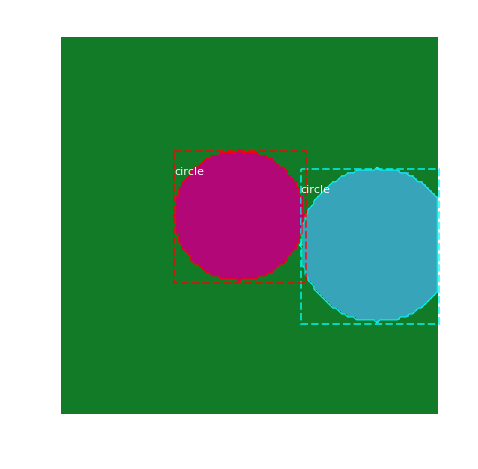

In [11]:
# Test on a random image
# Validation dataset
# dataset_val = shapes.ShapesDataset()
# dataset_val.load_shapes(50, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
# dataset_val.prepare()

from mrcnn.datagen import data_generator, load_image_gt

image_id = random.choice(dataset_val.image_ids)

original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    load_image_gt(dataset_val, inference_config, image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_bbox)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))

In [ ]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())

Processing 1 images
image                    shape: (128, 128, 3)         min:   15.00000  max:  239.00000
molded_images            shape: (1, 128, 128, 3)      min: -105.70000  max:  135.10000
image_metas              shape: (1, 12)               min:    0.00000  max:  128.00000


## Evaluation

In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
image_ids = np.random.choice(dataset_val.image_ids, 10)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id,
                         r["rois"], r["class_ids"], r["scores"])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

In [ ]:
# lay = mm.layers[229]
# print(lay.__class__, lay.__class__.__name__)
# pp.pprint(dir(lay))
# pp.pprint(lay.input_spec.__dict__)
# pp.pprint(lay.output.__dict__)
# print(type(lay.output))
# print(keras.backend.is_keras_tensor(lay))
# print(K.eval(lay.output))

In [ ]:
# print(pred_index.shape, pred_class.shape, pred_prob.shape)
# b_cpb = np.column_stack((pred_index, pred_class, pred_prob, rois)) # , b_probs)) #.transpose()
# print(' b_cpb shape: ',b_cpb.shape,'\n',b_cpb)

# print(b_cpb[:,3:] bbox_delta)

# nonbg_idx = np.argwhere(b_cpb[:,1]) 

# print(type(nonbg_idx))
# b_cpb_nonbg = b_cpb[nonbg_idx,:].squeeze()

# print(b_cpb_nonbg)
# order = b_cpb_nonbg[:,2].argsort()



# print('\n srtd_cpb : (idx, class, prob, y1, x1, y2, x2)',srtd_cpb.shape, '\n')
# print(srtd_cpb)

# # srtd_cpb_2 has (idx, cls_idx, prob, cx ,cy, width, height) instead of (idx, cls_idx, prob, y1, x1, y2, x2)

# width  = srtd_cpb[:,6]-srtd_cpb[:,4]
# height = srtd_cpb[:,5]-srtd_cpb[:,3]
# cx = srtd_cpb[:,4] + ( width  / 2.0)
# cy = srtd_cpb[:,3] + ( height / 2.0)
# print('\n srtd_cpb_2 : (idx, class, prob, cx ,cy, width, height) instead of (y1, x1, y2, x2)')
# srtd_cpb_2 = np.column_stack((srtd_cpb[:, 0:3], cx,cy, width, height ))

# print('\n',srtd_cpb_2)

### Get next shapes from generator and display loaded shapes

In [ ]:
train_batch_x, train_batch_y = next(train_generator)
imgmeta_idx = mm.input_names.index('input_image_meta')
img_meta    = train_batch_x[imgmeta_idx]

image_id = img_meta[0,0]
print('Image id: ',image_id)
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

image_id = img_meta[1,0]
print('Image id: ',image_id)
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [ ]:
from mrcnn.callbacks import get_layer_output_1,get_layer_output_2

pp = pprint.PrettyPrinter(indent=4)
# for i in range(len(mm.outputs)): 
#     print('shape of output layer: {}  is {}'.format(i, mm.outputs[i].shape))

# for i in (self.model.input):
    # print('input  type: {}'.format(i.get_shape()))

layers_out = get_layer_output_2(model.keras_model, train_batch_x, 1)

# print('type of layer out is {} shape is {}'.format(type(layer_out), layer_out.shape))


In [ ]:
imgmeta_idx = mm.input_names.index('input_image_meta')
img_meta    = train_batch_x[imgmeta_idx]

image_id = img_meta[0,0]
print('Image id: ',image_id)
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

image_id = img_meta[1,0]
print('Image id: ',image_id)
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [ ]:
%matplotlib notebook
from mrcnn.visualize import plot_gaussian
Zout = layers_out[1]
num_images = config.IMAGES_PER_GPU
num_classes = config.NUM_CLASSES
for img in range(num_images):
    for cls in range(num_classes):
        ttl = 'image :  {} class: {} '.format(img,cls)
        plot_gaussian(Zout[img,cls], title = ttl)

In [ ]:
from mrcnn.utils import trim_zeros
np.set_printoptions( edgeitems=32, suppress=True)
gt_bb = layers_out[3]
print(gt_bb.shape)
x0 = [ trim_zeros((gt_bb[0,i,:,:])) for i in range(4)]
ps0 = np.concatenate( x0, axis=0 )

x1 = [ trim_zeros((gt_bb[1,i,:,:])) for i in range(4)]
ps1 = np.concatenate( x1, axis=0 )
# print(np.concatenate( x1, axis=0 ))
print(ps0)

In [ ]:
print(ps0.shape)
width  = ps0[:,5] - ps0[:,3]
height = ps0[:,4] - ps0[:,2]
cx     = ps0[:,3] + ( width  / 2.0)
cy     = ps0[:,2] + ( height / 2.0)
means0  = np.stack((cx,cy,width, height),axis = -1)
print(means0)

### Display ground truth bboxes using load_image_gt

Here we are displaying the ground truth bounding boxes as provided by the dataset

In [ ]:
image_id = img_meta[0,0]
print('Image id: ',image_id)
p_original_image, p_image_meta, p_gt_class_id, p_gt_bbox, p_gt_mask =  \
            load_image_gt(dataset_train, config, image_id, augment=False, use_mini_mask=True)
# print(p_gt_class_id.shape, p_gt_bbox.shape, p_gt_mask.shape)
print(p_gt_bbox)
visualize.draw_boxes(p_original_image, p_gt_bbox)

image_id = img_meta[1,0]
print('Image id: ',image_id)
p_original_image, p_image_meta, p_gt_class_id, p_gt_bbox, p_gt_mask =  \
            load_image_gt(dataset_train, config, image_id, augment=False, use_mini_mask=True)
# print(p_gt_class_id.shape, p_gt_bbox.shape, p_gt_mask.shape)
print(p_gt_bbox)
visualize.draw_boxes(p_original_image, p_gt_bbox)

### Display bboxes from Ground Truth Info Passed to Net

Display the Ground Truth bounding boxes from the tensor we've constructed

In [ ]:
# np.set_printoptions(linewidth=120, precision=5)
# gt_bboxes = layers_out[5]
# print(layers_out[5].shape)
# print(layers_out[6])
# print(layers_out[5][1,3])

In [ ]:
image_id = img_meta[0,0]
print('Image id: ',image_id)
p_image, p_image_meta, p_gt_class_id, p_gt_bbox, p_gt_mask =  \
            load_image_gt(dataset_train, config, image_id, augment=False, use_mini_mask=True)
gt_bboxes = layers_out[5]
print(gt_bboxes[0,1,0:1,2:6])
print(gt_bboxes[0,2,0:2,2:6])
gt_bb = np.vstack((gt_bboxes[0,1,0:1,2:6],gt_bboxes[0,2,0:2,2:6]))
gt_bb.shape
visualize.draw_boxes(p_image, gt_bb)

## Display RoI proposals generated

Display bounding boxes from tensor of proposals produced by the network 

In [ ]:
img = 1
cls = 3
caps = [str(x) for x in pc_tensor.pred_tensor[img,cls,:,0].astype('int16').tolist() ]
print(caps)
# print(pc_tensor.pred_tensor[1,3,:])
# print(pc_tensor.pred_tensor[1,3,:,2:6])
visualize.draw_boxes(image, pc_tensor.pred_tensor[img,cls,:,2:6], captions = caps)

For each class:
- determine the center of each bounding box.
- center a 2d gaussian distribution with the mean = center of bounding box and sigma = height/width
- place dist on mesh grid
- normalize
- draw heatmap

In [ ]:
np.set_printoptions(precision=5)
from mrcnn.pc_layer import PCTensor
pc_tensor = PCTensor(model)
pc_tensor.build_predictions(sample_x)
print(pc_tensor.pred_stacked)    # list of tensors


In [ ]:
Zout2 = pc_tensor.build_gaussian_np()

### Plot

In [ ]:
from mrcnn.visualize import plot_gaussian
num_images = config.IMAGES_PER_GPU
num_classes = config.NUM_CLASSES
for img in range(num_images):
    for cls in range(num_classes):
        ttl = 'image :  {} class: {} '.format(img,cls)
        plot_gaussian(Zout1[img,cls], title = ttl)
#     print(Zout.shape)
# plot_gaussian(Zout)
# Zout = pc_tensor.build_gaussian()

In [ ]:
from mrcnn.visualize import plot_gaussian
num_images = config.IMAGES_PER_GPU
num_classes = config.NUM_CLASSES
for img in range(num_images):
    for cls in range(num_classes):
        ttl = 'image :  {} class: {} '.format(img,cls)
        plot_gaussian(Zout[img,cls], title = ttl)
#     print(Zout.shape)
# plot_gaussian(Zout)
# Zout = pc_tensor.build_gaussian()

In [ ]:
# img = 0
# cls = 0
# _cnt = pc_tensor.pred_cls_cnt[img,cls]
# print(_cnt)
# for box in range(_cnt):

#     mns = means[img,cls, 0 : _cnt]
#     print('img: ',img, 'class: ', cls, 'class count: ',_cnt, 'shape of mns :',mns.shape)
#     # print('** bbox is : ' ,self.pred_tensor[img,cls,box])
#     # print('    center is ({:4f},{:4f})  width is {:4f} height is {:4f} '\
#         # .format(mns[0],mns[1],width[img,cls,box],height[img,cls,box]))            
#     # fn = lambda x: multivariate_normal(x, [[12,0.0] , [0.0,19]])
#     # rv = tf.map_fn(fn, 
#     rv = np.apply_along_axis(multivariate_normal, 1, mns, [[12,0.0] , [0.0,19]])
#     print('rv :',rv.shape, rv)
#     _zo = rv.pdf(pos[img,cls])
#     print('zo :',_zo.shape)

In [ ]:
# pc_tensor.pred_stacked[0].eval(session=k_sess)
#

In [ ]:
tfd = tf.contrib.distributions
k_sess = KB.get_session()

In [ ]:
# pp1 = tf.fill([1,1,32], 12.0)
# pp2 = tf.fill([1,1,32], 19.0)
# pp  = tf.cast(tf.stack((pp1,pp2),axis=-1), dtype=tf.float64)
# tf.cast([12.0, 19.00], dtype=tf.float64)
# pp1.eval(session = k_sess)

# mvn = tfd.MultivariateNormalDiag(means[0,0,0,:],scale_diag=p1)
# mvn = tfd.MultivariateNormalDiag(means[0,0,0,:],scale_diag=p1)

# with k_sess.as_default():
#     print(mvn.mean())
#     print(mvn.batch_shape)
#     print(mvn.event_shape)
#     print(pos[0,0,:,0,0,:].shape)
#     rr = mvn.prob(pos[0,0,:,0,0,:])
#     print(rr)

In [ ]:
# %matplotlib notebook
# from mrcnn.visualize import plot_gaussian
# for i in range(0,config.IMAGES_PER_GPU):
#     for j in range(0,config.NUM_CLASSES):
#         ttl = 'image : {} class: {}'.format(i,j)
#         plot_gaussian(Zout[i,j] , title = ttl )
# # plot_gaussian(Zout[3])


In [ ]:
# Zout = np.zeros((num_classes, 128,128))
for i in range(1,config.NUM_CLASSES):
    print('class: ',i)
    for j in range(gt_cls_cnt[i]):
        Zout[i] = bbox_gaussian(gt_cpb[i,j], Zout[i])
print(Zout.shape)
 
# plot_gaussian(Zout[1])
# plot_gaussian(Zout[3])

## Fine Tuning
Fine tune all layers

In [ ]:
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=211,
            layers="all")

## Save 

In [ ]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, "mask_rcnn_shapes.h5")
model.keras_model.save_weights(model_path)

## Notebook Preferences

In [ ]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Configurations

In [ ]:
# from keras import backend as KB
# if 'tensorflow' == KB.backend():
#     import tensorflow as tf
#     from keras.backend.tensorflow_backend import set_session
#     # tfconfig = tf.ConfigProto(
#         # gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5),
#         # device_count = {'GPU': 1}
#     # )    
#     tfconfig = tf.ConfigProto()
#     tfconfig.gpu_options.allow_growth=True
#     tfconfig.gpu_options.visible_device_list = "0"
#     tfconfig.gpu_options.per_process_gpu_memory_fraction=0.5
#     tf_sess = tf.Session(config=tfconfig)
#     set_session(tf_sess)

### Training head using  Keras.model.fit_generator()

In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.

model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=69, 
            layers='heads')

### Training heads using train_on_batch()

We need to use this method for the time being as the fit generator does not have provide EASY access to the output in Keras call backs. By training in batches, we pass a batch through the network, pick up the generated RoI detections and bounding boxes and generate our semantic / gaussian tensors ...



In [ ]:
model.train_in_batches(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs_to_run = 2,
            layers='heads')

### Simulate one training iteration

In [ ]:
from mrcnn.datagen import data_generator, load_image_gt
np.set_printoptions(linewidth=100)
learning_rate=model.config.LEARNING_RATE
epochs_to_run = 2
layers='heads'
batch_size = 0
steps_per_epoch = 0
# assert self.mode == "training", "Create model in training mode."
# Pre-defined layer regular expressions
layer_regex = {
    # all layers but the backbone
    "heads": r"(mrcnn\_.*)|(rpn\_.*)|(fpn\_.*)",
    # From a specific Resnet stage and up
    "3+": r"(res3.*)|(bn3.*)|(res4.*)|(bn4.*)|(res5.*)|(bn5.*)|(mrcnn\_.*)|(rpn\_.*)|(fpn\_.*)",
    "4+": r"(res4.*)|(bn4.*)|(res5.*)|(bn5.*)|(mrcnn\_.*)|(rpn\_.*)|(fpn\_.*)",
    "5+": r"(res5.*)|(bn5.*)|(mrcnn\_.*)|(rpn\_.*)|(fpn\_.*)",
    # All layers
    "all": ".*",
}

if layers in layer_regex.keys():
    layers = layer_regex[layers]
if batch_size == 0 :
    batch_size = model.config.BATCH_SIZE            
if steps_per_epoch == 0:
    steps_per_epoch = model.config.STEPS_PER_EPOCH

# Data generators
train_generator = data_generator(dataset_train, model.config, shuffle=True,
                                 batch_size=batch_size)
val_generator   = data_generator(dataset_val, model.config, shuffle=True,
                                 batch_size=batch_size,
                                 augment=False)

# Train
log("Last epoch completed : {} ".format(model.epoch))
log("Starting from epoch {} for {} epochs. LR={}".format(model.epoch, epochs_to_run, learning_rate))
log("Steps per epoch:    {} ".format(steps_per_epoch))
log("Batchsize      :    {} ".format(batch_size))
log("Checkpoint Folder:  {} ".format(model.checkpoint_path))
epochs = model.epoch + epochs_to_run

from tensorflow.python.platform import gfile
if not gfile.IsDirectory(model.log_dir):
    log('Creating checkpoint folder')
    gfile.MakeDirs(model.log_dir)
else:
    log('Checkpoint folder already exists')

model.set_trainable(layers)            
model.compile(learning_rate, model.config.LEARNING_MOMENTUM)        

out_labels = model.keras_model._get_deduped_metrics_names()
callback_metrics = out_labels + ['val_' + n for n in out_labels]

progbar = keras.callbacks.ProgbarLogger(count_mode='steps')
progbar.set_model(model.keras_model)
progbar.set_params({
    'epochs': epochs,
    'steps': steps_per_epoch,
    'verbose': 1,
    'do_validation': False,
    'metrics': callback_metrics,
})

progbar.set_model(model.keras_model) 

chkpoint = keras.callbacks.ModelCheckpoint(model.checkpoint_path, 
                                           monitor='loss', verbose=1, save_best_only = True, save_weights_only=True)
chkpoint.set_model(model.keras_model)

progbar.on_train_begin()
epoch_idx = model.epoch

In [ ]:
if epoch_idx >= epochs:
    print('Final epoch {} has already completed - Training will not proceed'.format(epochs))

# while epoch_idx < epochs :
progbar.on_epoch_begin(epoch_idx)
steps_index = 0
# for steps_index in range(steps_per_epoch):

batch_logs = {}
print(' self.epoch {}   epochs {}  step {} '.format(model.epoch, epochs, steps_index))
batch_logs['batch'] = steps_index
batch_logs['size']  = batch_size
progbar.on_batch_begin(steps_index, batch_logs)

In [ ]:
train_batch_x, train_batch_y = next(train_generator)

In [ ]:
imgmeta_idx= model.keras_model.input_names.index('input_image_meta')
img_meta  =  train_batch_x[imgmeta_idx]

image_id = img_meta[0,0]
print('Image id: ',image_id)
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

image_id = img_meta[1,0]
print('Image id: ',image_id)
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [ ]:
outs = model.keras_model.train_on_batch(train_batch_x, train_batch_y)

In [ ]:
if not isinstance(outs, list):
    outs = [outs]
for l, o in zip(out_labels, outs):
    batch_logs[l] = o

    progbar.on_batch_end(steps_index, batch_logs)

        # print(outs)
    progbar.on_epoch_end(epoch_idx, {})
    # if (epoch_idx % 10) == 0:
    chkpoint.on_epoch_end(epoch_idx  , batch_logs)
    epoch_idx += 1

# if epoch_idx != self.epoch:
# chkpoint.on_epoch_end(epoch_idx -1, batch_logs)
model.epoch = max(epoch_idx - 1, epochs)

print('Final : self.epoch {}   epochs {}'.format(model.epoch, epochs))
# end if (else)